In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('Titanic-Dataset.csv')

In [7]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

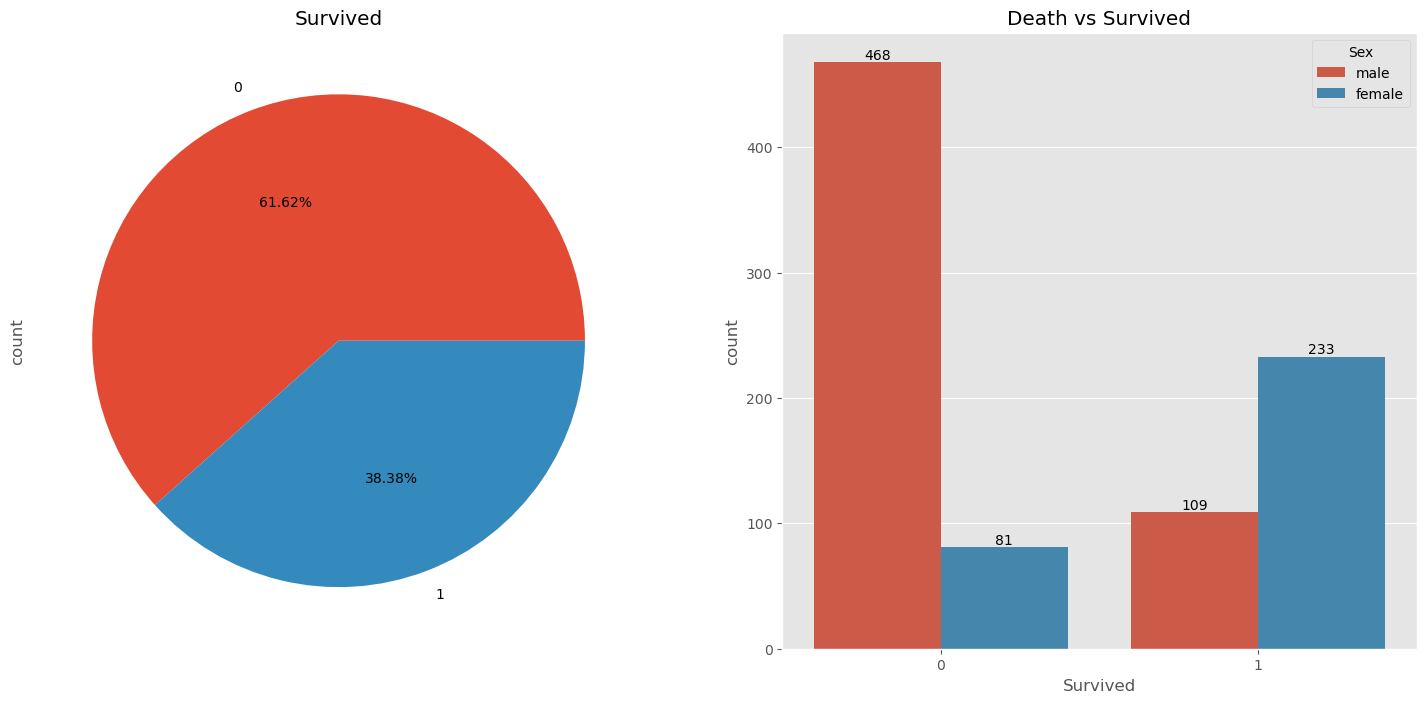

In [13]:
f,ax = plt.subplots(1, 2, figsize=(18,8))

data['Survived'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survived')
# ax[0].set_ylabel('')

#datalabel= sns.countplot(x=data['Survived'], ax=ax[1])
datalabel= sns.countplot(x=data['Survived'], ax=ax[1], hue=data['Sex'])
ax[1].set_title('Death vs Survived')
for i in datalabel.containers:
    datalabel.bar_label(i,)


In [14]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


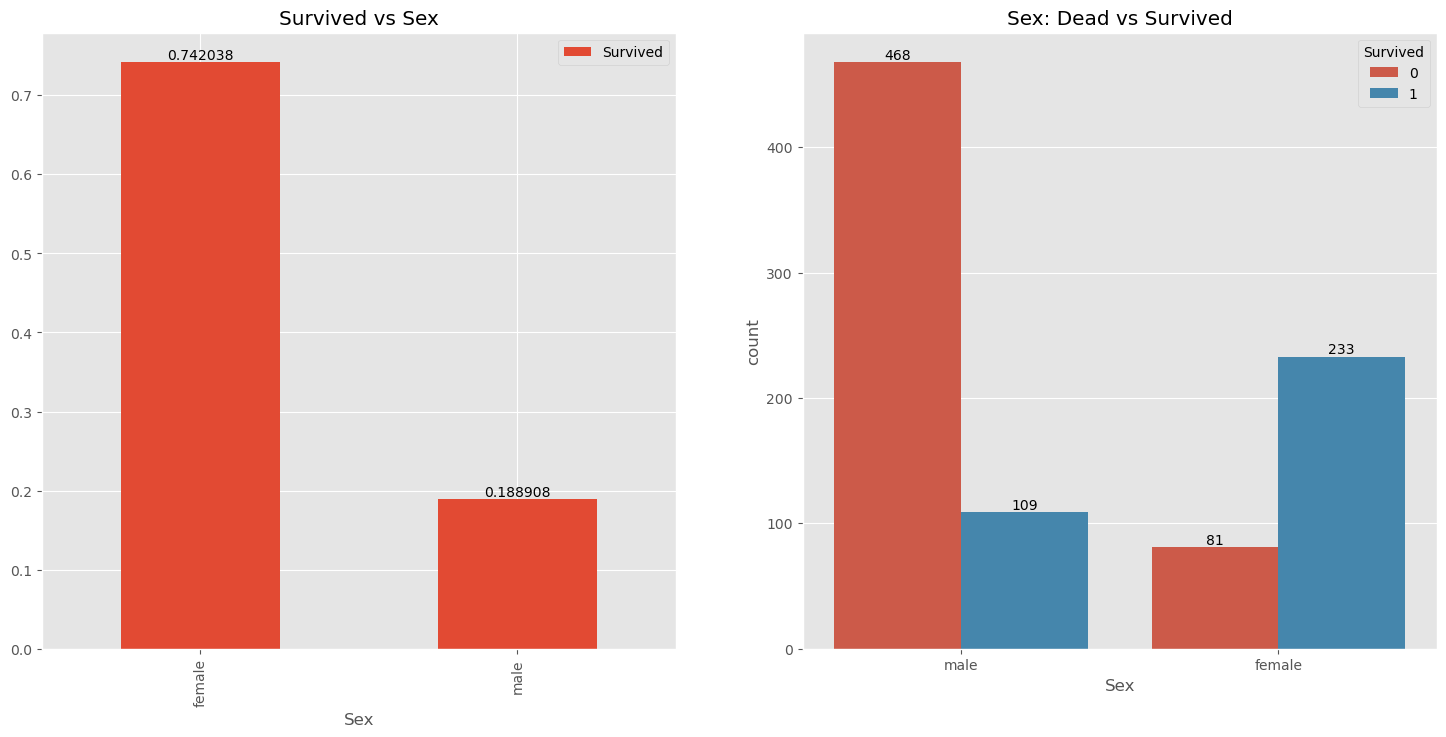

In [19]:
#total Survived based on sex
f,ax=plt.subplots(1,2,figsize=(18,8))

datalabel=data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
for i in datalabel.containers:
    datalabel.bar_label(i,)
ax[0].set_title('Survived vs Sex')

datalabel=sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Dead vs Survived')
for i in datalabel.containers:
    datalabel.bar_label(i,)
plt.show()

In [20]:
#Survived vs Pclass
pd.crosstab(data.Pclass, data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

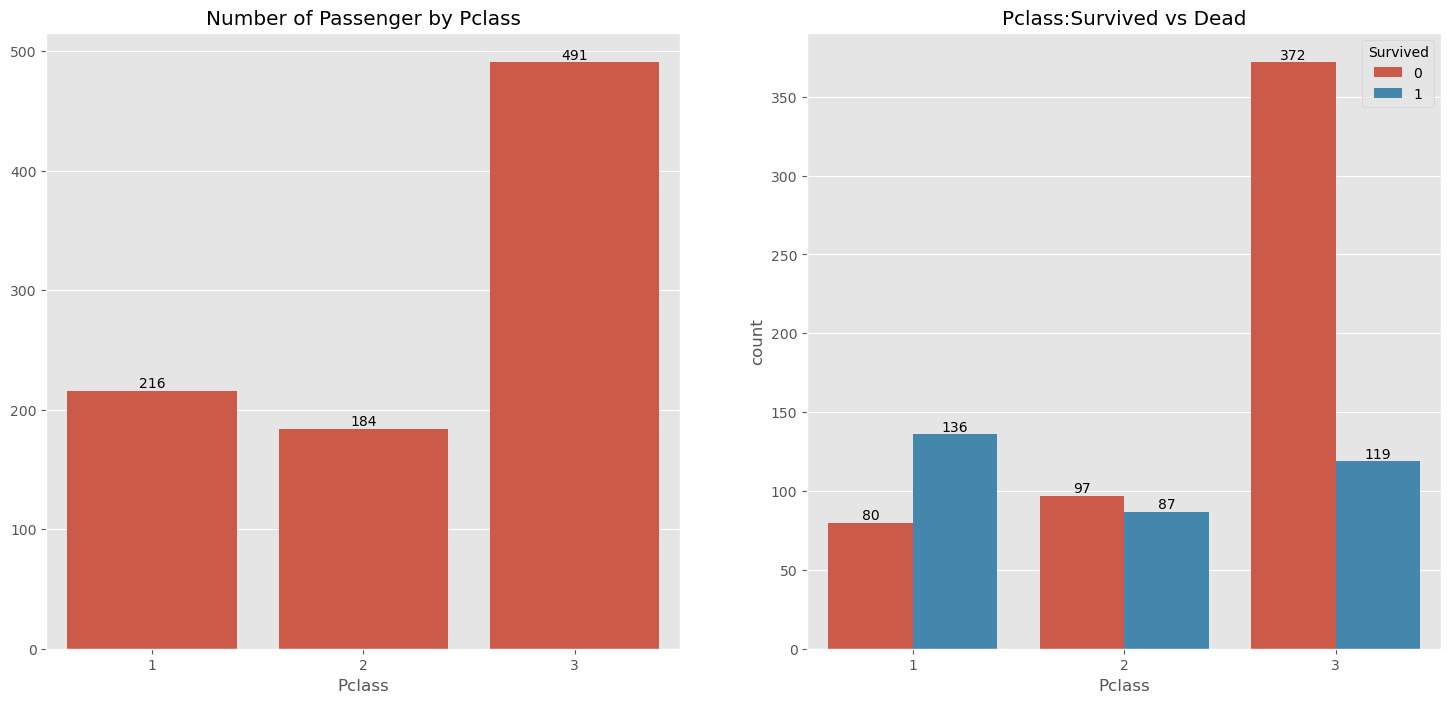

In [23]:
#Survived based on Pclss
f, ax = plt.subplots(1, 2, figsize=(18, 8))
#datalabel=data['Pclass'].value_counts().plot.bar(color=[ax=ax[0])

datalabel=sns.barplot(x=data['Pclass'].value_counts().index, 
            y=data['Pclass'].value_counts().values, 
            ax=ax[0])
for i in datalabel.containers:
    datalabel.bar_label(i,)
ax[0].set_title('Number of Passenger by Pclass')
datalabel=sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
for i in datalabel.containers:
    datalabel.bar_label(i,)
ax[1].set_title('Pclass:Survived vs Dead')


***Data Preprocessing***

**Age Null values**

In [27]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
#Fix the null age values do [Salutation]
data['Initial'] = 'other'

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') 

In [31]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [33]:
pd.crosstab(data.Initial,data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [35]:
data['Initial'].replace(['Mlle','Mme','Ms',   'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr',  'Mrs',   'Mrs',    'Other', 'Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [37]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [39]:
data.groupby(data.Initial)['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [41]:
data.Age.isnull().sum()

177

In [43]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

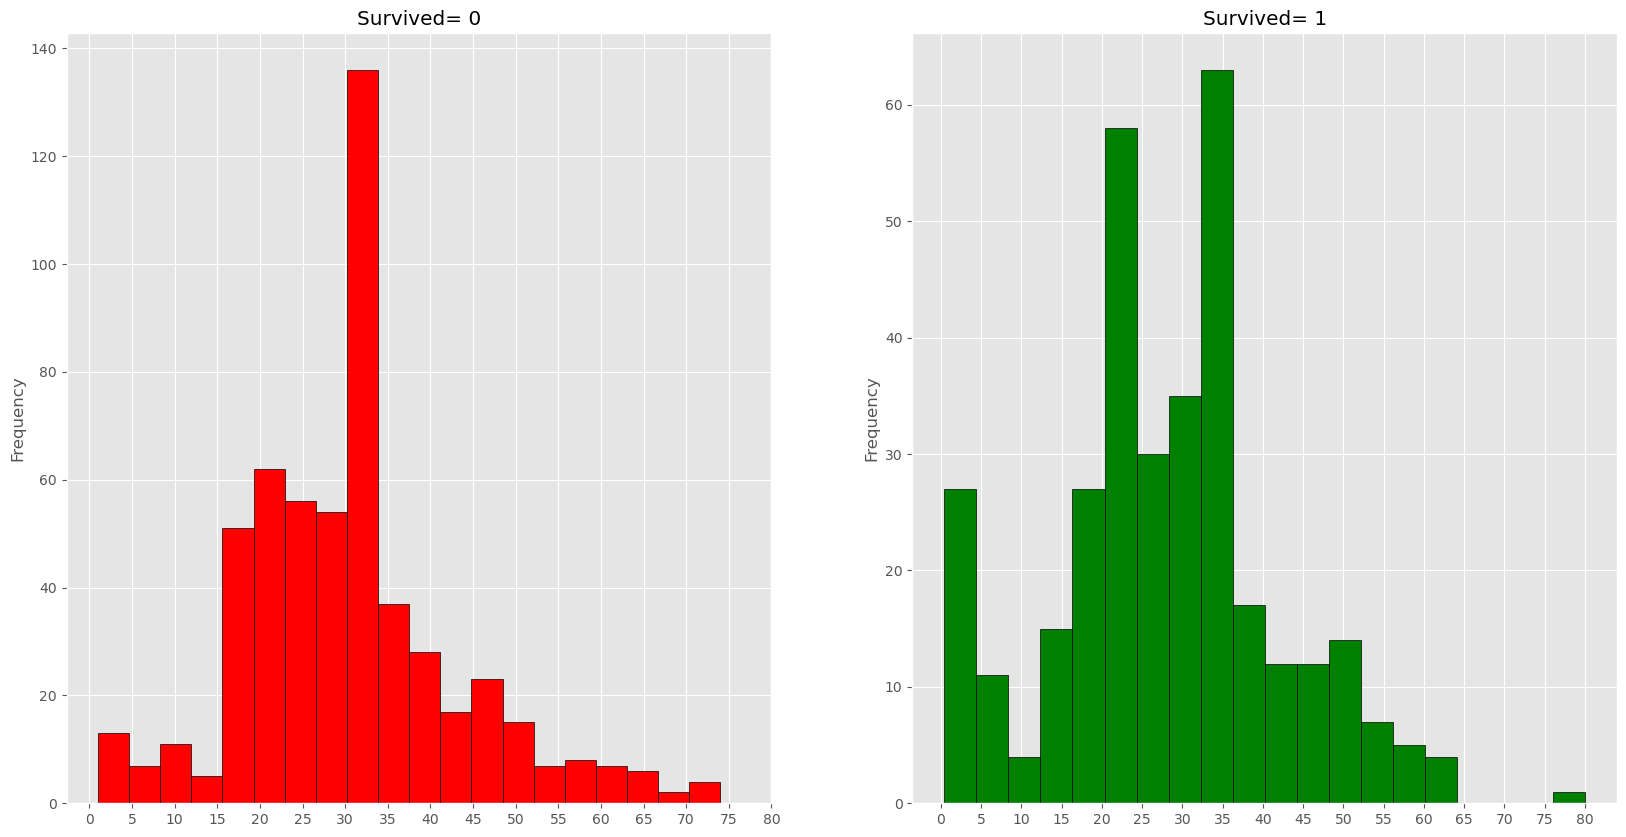

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [46]:
data.Age.isnull().sum()  #no null value remaining

0

**Embarked**

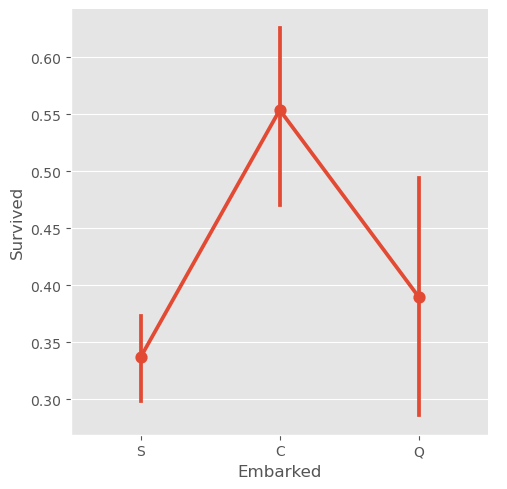

In [50]:
sns.catplot(x='Embarked',y='Survived', kind="point", data=data)
plt.show()

Figure(1000x800)


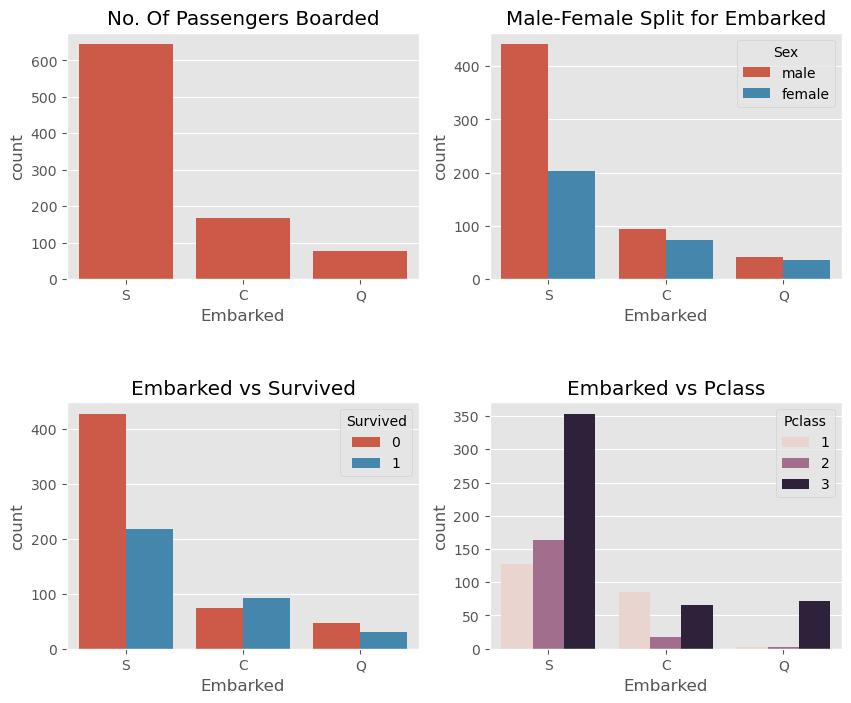

In [52]:
f, ax=plt.subplots(2,2,figsize=(10,8))
print(f)
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [54]:
data['Embarked'].isnull().sum()

2

In [56]:
data['Embarked'].fillna('S', inplace=True)

In [58]:
data.Embarked.isnull().sum()# Finally No NaN values

0

**Cabin**

In [61]:
data.drop(columns=['Cabin'],inplace=True)

In [63]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64

**Encoding**

In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [68]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  #labelencoding

In [70]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,Mr


In [72]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  #OneHotEncoder

In [74]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Initial,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Mr,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,Mrs,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Miss,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,Mrs,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Mr,False,True


# Model Training

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, precision_score, roc_auc_score,
    classification_report, matthews_corrcoef, mean_squared_error
)
from sklearn.model_selection import train_test_split

In [154]:
X=data.drop(['Survived','Name','Initial','Ticket'],axis=1)
y=data.Survived

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [158]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 9), (268, 9), (623,), (268,))

In [160]:
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42)
]

In [162]:
results = []

In [164]:
# Function to evaluate each model
def evaluation(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
    }

In [170]:
# Iterate through classifiers and train/evaluate them
for clf in classifiers:
    print(f"\n----Training with {clf.__class__.__name__}----")

    # Train the model
    clf.fit(X_train, y_train)

    # Training set results
    print("----Training Set Results----")
    y_train_pred = clf.predict(X_train)
    y_train_proba = clf.predict_proba(X_train)[:, 1] if hasattr(clf, 'predict_proba') else None
    train_metrics = evaluation(y_train, y_train_pred, y_train_proba)

    # Test set results
    print("\n----Test Set Results----")
    y_test_pred = clf.predict(X_test)
    y_test_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None
    test_metrics = evaluation(y_test, y_test_pred, y_test_proba)

    # Overall Test Set Report
    print("\n----Overall Test Set Report----")
    print(classification_report(y_true=y_test, y_pred=y_test_pred))

    # Save metrics to the results list
    model_results = {
        'Model': clf.__class__.__name__,
        'Train Accuracy': train_metrics['Accuracy'],
        'Train Recall': train_metrics['Recall'],
        'Train F1 Score': train_metrics['F1 Score'],
        'Train Precision': train_metrics['Precision'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Test Recall': test_metrics['Recall'],
        'Test F1 Score': test_metrics['F1 Score'],
        'Test Precision': test_metrics['Precision'],
    }

    results.append(model_results)


----Training with DecisionTreeClassifier----
----Training Set Results----

----Test Set Results----

----Overall Test Set Report----
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       157
           1       0.70      0.70      0.70       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268


----Training with RandomForestClassifier----
----Training Set Results----

----Test Set Results----

----Overall Test Set Report----
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268


----Training with GradientBoostingClassifier----
----Training Set Results----

In [174]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('Taitanic.csv', index=False)

# Display the DataFrame
print("\n----Model Evaluation Results Saved to CSV----")
print(results_df)



----Model Evaluation Results Saved to CSV----
                         Model  Train Accuracy  Train Recall  Train F1 Score  \
0       DecisionTreeClassifier        1.000000      1.000000        1.000000   
1       RandomForestClassifier        1.000000      1.000000        1.000000   
2   GradientBoostingClassifier        0.906902      0.800866        0.864486   
3           AdaBoostClassifier        0.842697      0.744589        0.778281   
4            BaggingClassifier        0.980738      0.952381        0.973451   
5         ExtraTreesClassifier        1.000000      1.000000        1.000000   
6       DecisionTreeClassifier        1.000000      1.000000        1.000000   
7       RandomForestClassifier        1.000000      1.000000        1.000000   
8   GradientBoostingClassifier        0.906902      0.800866        0.864486   
9           AdaBoostClassifier        0.842697      0.744589        0.778281   
10           BaggingClassifier        0.980738      0.952381        0.973